In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# **● Download the Dataset**

In [4]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import os

In [5]:
batch_size = 16

# **● Image Augmentation**

In [8]:
data_aug = Sequential(
  [
    layers.RandomFlip("horizontal",input_shape=(180, 180, 3)),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
  ]
)
os.listdir("../input/flowers-dataset")

['sample_submission.csv',
 'Testing_set_flower.csv',
 'LICENSE.txt',
 'test',
 'train']

In [9]:
train_data = tf.keras.utils.image_dataset_from_directory(
  "../input/flowers-dataset",
  validation_split=0.25,
  subset="training",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 3670 files belonging to 2 classes.
Using 2753 files for training.


In [10]:
val_data_set = tf.keras.utils.image_dataset_from_directory(
 "../input/flowers-dataset",
  validation_split=0.25,
  subset="validation",
  seed=120,
  image_size=(180, 180),
  batch_size=batch_size)

Found 3670 files belonging to 2 classes.
Using 917 files for validation.


2022-10-19 09:09:02.322389: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


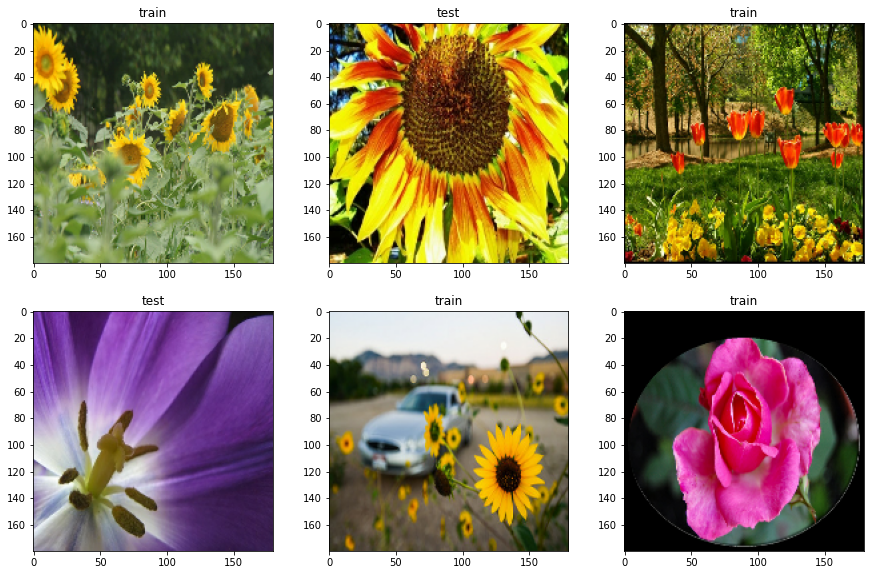

In [11]:
class_names = train_data.class_names
plt.figure(figsize=(15, 15))
for images, labels in train_data.take(1):
  for i in range(6):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])

In [12]:
normalization_layer = layers.Rescaling(1./255)
dataset_normalized = train_data.map(lambda x, y: (normalization_layer(x), y))
image_batch, labels_batch = next(iter(dataset_normalized))
first_image = image_batch[0]
print(np.min(first_image), np.max(first_image))

0.0 0.94723904


# **● Create Model**

# **● Add Layers (Convolution,MaxPooling,Flatten,Dense-(Hidden Layers),Output)**

In [13]:
num_classes = len(class_names)

model = Sequential([
  data_aug,
  layers.Rescaling(1./255, input_shape=(180, 180, 3)),
  layers.Conv2D(16, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3,activation='relu'),
  layers.Conv2D(32, 3,activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

# **● Compile The Model**

In [14]:
# compiling model with categorical cross entropy and adam optimizer
model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])

# **● Fit The Model**

In [15]:
epochs=15
history = model.fit(train_data,validation_data=val_data_set,epochs=epochs)

Epoch 1/15
173/173 [==============================] - 43s 240ms/step - loss: 0.5761 - accuracy: 0.7483 - val_loss: 0.5817 - val_accuracy: 0.7372
Epoch 2/15
173/173 [==============================] - 41s 236ms/step - loss: 0.5658 - accuracy: 0.7519 - val_loss: 0.5806 - val_accuracy: 0.7372
Epoch 3/15
173/173 [==============================] - 41s 234ms/step - loss: 0.5633 - accuracy: 0.7519 - val_loss: 0.5727 - val_accuracy: 0.7372
Epoch 4/15
173/173 [==============================] - 41s 238ms/step - loss: 0.5646 - accuracy: 0.7519 - val_loss: 0.5770 - val_accuracy: 0.7372
Epoch 5/15
173/173 [==============================] - 40s 233ms/step - loss: 0.5585 - accuracy: 0.7519 - val_loss: 0.5736 - val_accuracy: 0.7372
Epoch 6/15
173/173 [==============================] - 41s 234ms/step - loss: 0.5587 - accuracy: 0.7519 - val_loss: 0.5762 - val_accuracy: 0.7372
Epoch 7/15
173/173 [==============================] - 40s 233ms/step - loss: 0.5574 - accuracy: 0.7519 - val_loss: 0.5763 - val_ac

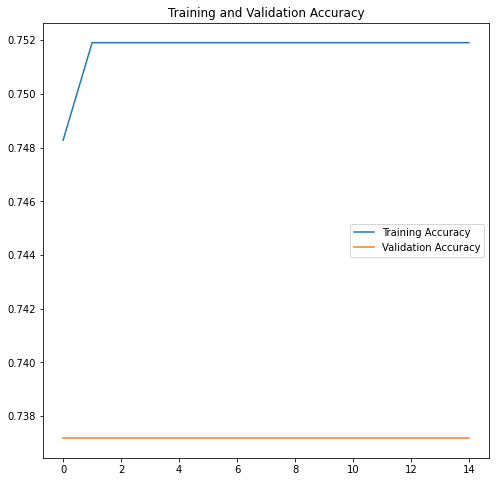

In [18]:
epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['accuracy'], label='Training Accuracy')
plt.plot(epochs_range, history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

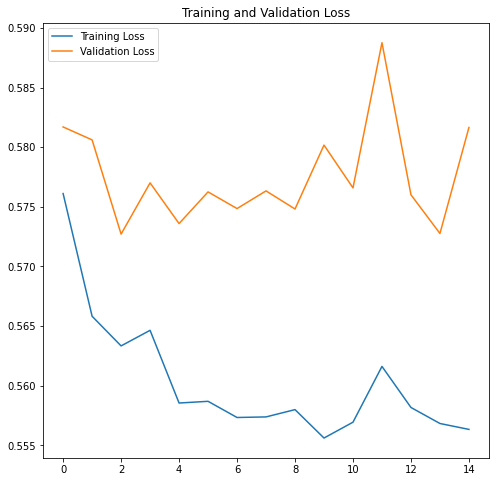

In [19]:
plt.figure(figsize=(8, 8))
plt.plot(epochs_range, history.history['loss'], label='Training Loss')
plt.plot(epochs_range, history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

# **● Save The Model**

In [21]:
model.save("./flowers.h5")
model.load_weights('./flowers.h5')

# **● Test The Model**

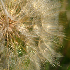

In [24]:
from tensorflow.keras.preprocessing import image
import numpy as np
img=image.load_img('../input/flowers-dataset/test/Image_10.jpg',target_size=(70,70))
img